In [16]:
from utils import *
from fiber_ec import fiber_ec
from new_distance_transform import new_distance_transform
import pandas as pd
# from IPython.display import display
from tabulate import tabulate
from skeleton_net_pp import skeleton_net_pp
import matplotlib.pyplot as plt
import pickle

In [26]:
sample_file = '_sample.png'
sample_gt = '_sample_gt.png'
# samples_folder = ''
# diameter_count = {5:5, 6:6}

a_file = open("diameter_count_gt.pkl", "rb")
diameter_count_gt = pickle.load(a_file)
a_file.close()


diameter_count_fec = fiber_ec(sample_file)
diameter_count_ndt = new_distance_transform(sample_file)
diameter_count_snp = skeleton_net_pp(sample_gt)

gt_diam_mean = get_mean_diameter(diameter_count_gt)
fec_diam_mean = get_mean_diameter(diameter_count_fec)
ndt_diam_mean = get_mean_diameter(diameter_count_ndt)
snp_diam_mean = get_mean_diameter(diameter_count_snp)


mydataset = {
  'Método': ["Ground Truth","FIBER-EC", "New Distance Transform", "SkelNet + PP"],
  'Diametro Promedio (px)': [gt_diam_mean, fec_diam_mean, ndt_diam_mean, snp_diam_mean]
}

df = pd.DataFrame(mydataset)

print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+----+------------------------+--------------------------+
|    | Método                 |   Diametro Promedio (px) |
|----+------------------------+--------------------------|
|  0 | Ground Truth           |                  7.60817 |
|  1 | FIBER-EC               |                  8.25    |
|  2 | New Distance Transform |                  8.45768 |
|  3 | SkelNet + PP           |                  7.90747 |
+----+------------------------+--------------------------+


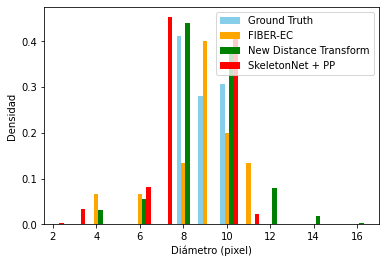

In [22]:
densidades_gt = [v/sum(diameter_count_gt.values()) for v in diameter_count_gt.values()]
densidades_fec = [v/sum(diameter_count_fec.values()) for v in diameter_count_fec.values()]
densidades_ndt = [v/sum(diameter_count_ndt.values()) for v in diameter_count_ndt.values()]
densidades_snp = [v/sum(diameter_count_snp.values()) for v in diameter_count_snp.values()]

# plt.bar(x1, y1, width=0.4, color='r', label='Ground Truth')
plt.bar([k-0.2 for k in diameter_count_gt.keys()], densidades_gt, width=0.2, color='skyblue', label='Ground Truth')
plt.bar(diameter_count_fec.keys(), densidades_fec, width=0.2, color='orange', label='FIBER-EC')
# plt.bar([k+0.2 for k in diameter_count_x.keys()], densidades_x, width=0.2, color='green', label='X')
plt.bar([k+0.2 for k in diameter_count_ndt.keys()], densidades_ndt, width=0.2, color='green', label='New Distance Transform')
plt.bar([k+0.4 for k in diameter_count_snp.keys()], densidades_snp, width=0.2, color='red', label='SkeletonNet + PP')
# plt.bar(x, y, width=0.4, color='green', label='New Distance Transform')
# plt.bar(x2, y2, width=0.4, color='blue', label='SkelNet + PP')

plt.legend()
plt.ylabel('Densidad')
plt.xlabel('Diámetro (pixel)')
# plt.savefig('histograma.png')
plt.show()

In [16]:
print(diameter_count_fec)
print(diameter_count_ndt)

{7: 4, 6: 1, 10: 3, 4: 1, 11: 1, 8: 1, 9: 1, 12: 1, 3: 1}
{2.0: 18, 4.0: 187, 6.0: 29, 8.0: 245, 10.0: 282, 12.0: 41, 14.0: 8, 16.0: 1}
